In [226]:
import pandas as pd
data = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/research/MCarloLongRuns/data/data2.csv")
print(data)
import matplotlib.pyplot as plt
import seaborn as sns




       Unnamed: 0     F      H  WShare_NT  WShare_VI  WShare_TF  SharpeNT  \
0               0  0.10  756.0  34.769446  37.727940  27.502614  0.363728   
1               1  0.10  756.0  39.152817  38.617571  22.229612  0.449156   
2               2  0.10  756.0  34.593041  35.692292  29.714666  0.366437   
3               3  0.10  756.0  28.265896  54.258294  17.475810  0.694857   
4               4  0.10  756.0  34.610598  36.393917  28.995486  0.365813   
...           ...   ...    ...        ...        ...        ...       ...   
19495       19495  1.95  504.0  31.755050  46.864907  21.380043  0.789381   
19496       19496  1.95  504.0  28.054688  49.502846  22.442466  1.222413   
19497       19497  1.95  504.0  26.166443  56.746804  17.086753  0.691226   
19498       19498  1.95  504.0  39.011562  39.237729  21.750709  0.431884   
19499       19499  1.95  504.0  31.248959  40.980677  27.770365  0.740173   

       SharpeVI  SharpeTF  DeltaNTVI  DeltaNTTF  DeltaVITF  AvgSignificance

In [227]:
def mean_without_outlier(x): # x: series
    iqr = x.quantile(.75) - x.quantile(.25)
    y = x[x.between(x.quantile(.25) - 1.5*iqr, x.quantile(.75) + 1.5*iqr)]
    return y.mean()

data['SumDelta'] = (data['DeltaVITF'] + data['DeltaNTTF'] + data['DeltaNTVI']) / 3

data['AvgSharpe'] = (data['SharpeNT'] + data['SharpeVI'] + data['SharpeTF']) / 3

data['Sharpe_excess_NT'] = data['SharpeNT'] - data['AvgSharpe']
data['Sharpe_excess_VI'] = data['SharpeVI'] - data['AvgSharpe']
data['Sharpe_excess_TF'] = data['SharpeTF'] - data['AvgSharpe']

data['DiffSharpes'] = (data['SharpeNT'] - data['SharpeTF']) ** 2 + (data['SharpeNT'] - data['SharpeVI']) ** 2 + (data['SharpeVI'] - data['SharpeTF']) ** 2 

def heat_data(original_data, column):
    data2 = original_data.copy()
    data_temp = pd.DataFrame()
    data_temp['Gen'] = data2['Unnamed: 0']
    data_temp['F'] = data2['F']
    data_temp['H'] = data2['H'].astype(int)
    data_temp['T'] = data2[column]
    data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
    data_ready = data_temp2.pivot(index='H', columns='F', values = 'T')
    return data_ready

sns.set(font_scale=1) 
fontsize = 18


# How does investment change ecology dynamics?

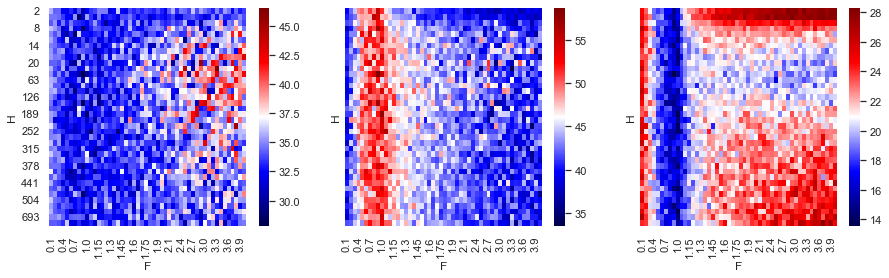

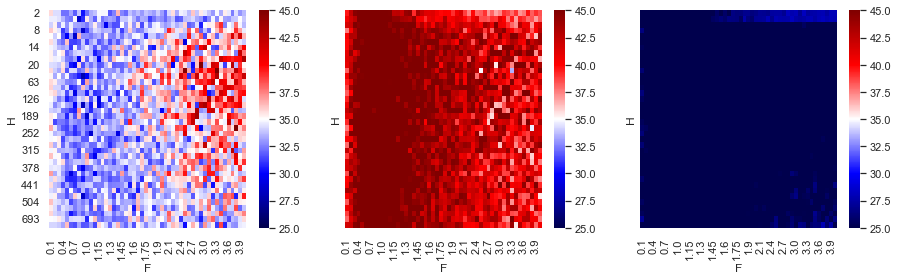

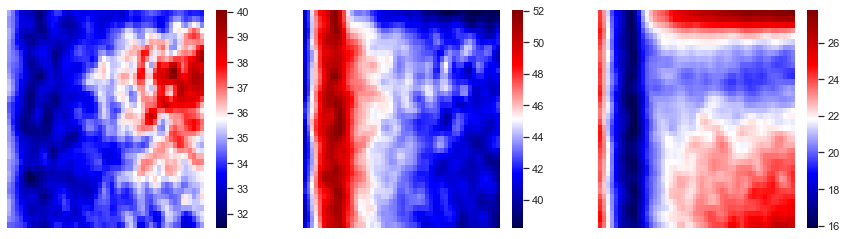

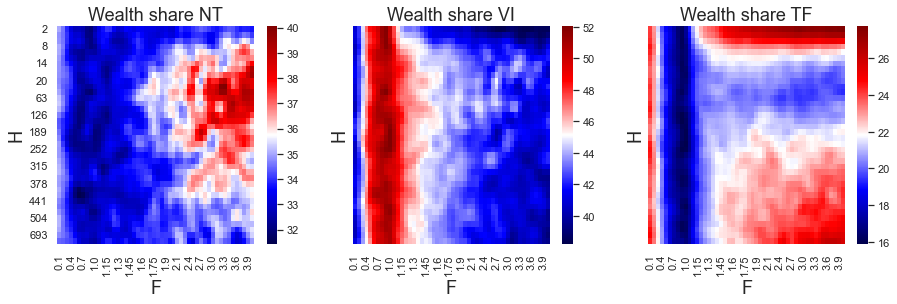

In [235]:
''' Raw data'''
# data2 = data.loc[(data['F'] != 0.0) & (data['H'] != 2.0 ) & (data['SumDelta'] >= 0.0) & (data['SumDelta'] <= 10.0)]
data2 = data.copy()
data_temp = pd.DataFrame()
data_temp['Gen'] = data2['Unnamed: 0']
data_temp['F'] = data2['F']
data_temp['H'] = data2['H'].astype(int)
data_temp['T'] = data2['WShare_NT']
# data_temp['T'] = gaussian_filter(data2['WShare_NT'], sigma=sigma)
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivoted_NT = data_temp2.pivot(index='H', columns='F', values = 'T')
# data_pivoted_NT = gaussian_filter(data_pivoted_NT, sigma=1)

data_temp['T'] = data2['WShare_VI']
# data_temp['T'] = gaussian_filter(data2['WShare_VI'], sigma=sigma)
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivotedVI = data_temp2.pivot(index='H', columns='F', values = 'T')
# data_pivotedVI = gaussian_filter(data_pivotedVI, sigma=1)

data_temp['T'] = data2['WShare_TF']
# data_temp['T'] = gaussian_filter(data2['WShare_TF'], sigma=sigma)
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivotedTF = data_temp2.pivot(index='H', columns='F', values = 'T')
# data_pivotedTF = gaussian_filter(data_pivotedTF, sigma=1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,4), sharey=True, sharex=True)
vmin, vmax = 0, 50 # , vmin = vmin, vmax = vmax as arg of heatmap
cmap = 'seismic'
model = sns.heatmap(data_pivoted_NT, ax=ax1, cmap = cmap)
sns.heatmap(data_pivotedVI, ax=ax2, cmap = cmap)
sns.heatmap(data_pivotedTF, ax=ax3, cmap = cmap)
plt.show()

''' With common Z axis '''
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,4), sharey=True, sharex=True)
vmin, vmax = 25, 45 # ,  as arg of heatmap
cmap = 'seismic'
sns.heatmap(data_pivoted_NT, ax=ax1, cmap = cmap, vmin = vmin, vmax = vmax)
sns.heatmap(data_pivotedVI, ax=ax2, cmap = cmap, vmin = vmin, vmax = vmax)
sns.heatmap(data_pivotedTF, ax=ax3, cmap = cmap, vmin = vmin, vmax = vmax)
plt.show()

''' With smoothing '''
from scipy.ndimage.filters import gaussian_filter
sigma = 1
# data2 = data.loc[(data['F'] != 0.0) & (data['H'] != 2.0 ) & (data['SumDelta'] >= 0.0) & (data['SumDelta'] <= 10.0)]
data2 = data.copy()
data_temp = pd.DataFrame()
data_temp['Gen'] = data2['Unnamed: 0']
data_temp['F'] = data2['F']
data_temp['H'] = data2['H'].astype(int)
data_temp['T'] = data2['WShare_NT']
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivoted_NT = data_temp2.pivot(index='H', columns='F', values = 'T')
data_pivoted_NT = gaussian_filter(data_pivoted_NT, sigma=sigma)

data_temp['T'] = data2['WShare_VI']
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivotedVI = data_temp2.pivot(index='H', columns='F', values = 'T')
data_pivotedVI = gaussian_filter(data_pivotedVI, sigma=sigma)
# print(data_pivotedVI)

data_temp['T'] = data2['WShare_TF']
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivotedTF = data_temp2.pivot(index='H', columns='F', values = 'T')
data_pivotedTF = gaussian_filter(data_pivotedTF, sigma=sigma)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,4), sharey=True, sharex=True)
vmin, vmax = 0, 50 # , vmin = vmin, vmax = vmax as arg of heatmap
cmap = 'seismic'
sns.heatmap(data_pivoted_NT, ax=ax1, cmap = cmap, yticklabels=False, xticklabels=False)
sns.heatmap(data_pivotedVI, ax=ax2, cmap = cmap, yticklabels=False, xticklabels=False)
sns.heatmap(data_pivotedTF, ax=ax3, cmap = cmap, yticklabels=False, xticklabels=False)
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,4), sharey=True, sharex=True)
cmap = 'seismic'
fig1 = sns.heatmap(data_pivoted_NT, ax=ax1, cmap = cmap)
fig2 = sns.heatmap(data_pivotedVI, ax=ax2, cmap = cmap)
fig3 = sns.heatmap(data_pivotedTF, ax=ax3, cmap = cmap)
ax1.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax2.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax3.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax1.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax2.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax3.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax1.set_xlabel("F", fontsize=fontsize)
ax1.set_ylabel("H", fontsize=fontsize)
ax2.set_xlabel("F", fontsize=fontsize)
ax2.set_ylabel("H", fontsize=fontsize)
ax3.set_xlabel("F", fontsize=fontsize)
ax3.set_ylabel("H", fontsize=fontsize)
ax1.set_title("Wealth share NT", fontsize=fontsize)
ax2.set_title("Wealth share VI", fontsize=fontsize)
ax3.set_title("Wealth share TF", fontsize=fontsize)
plt.savefig('WealthShares.png', dpi=300)
plt.show()




# Change of statistical significance

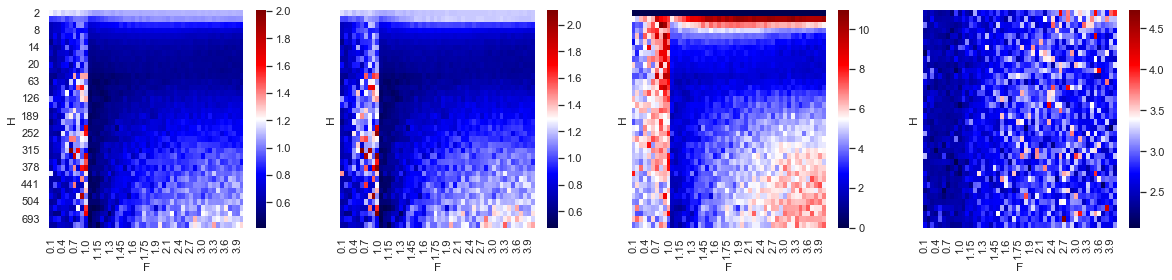

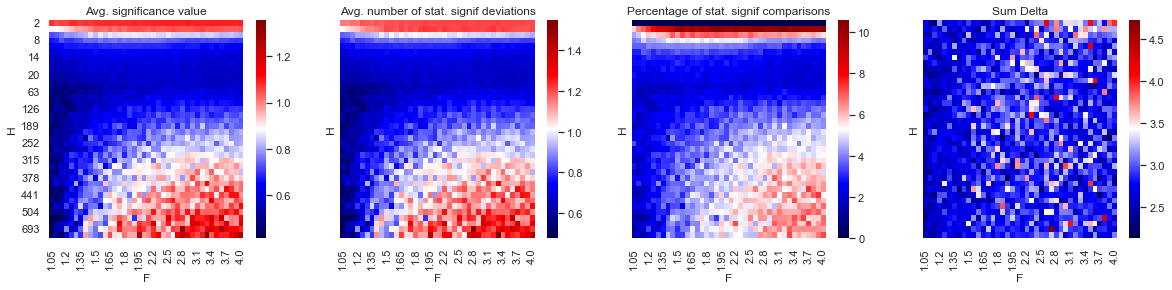

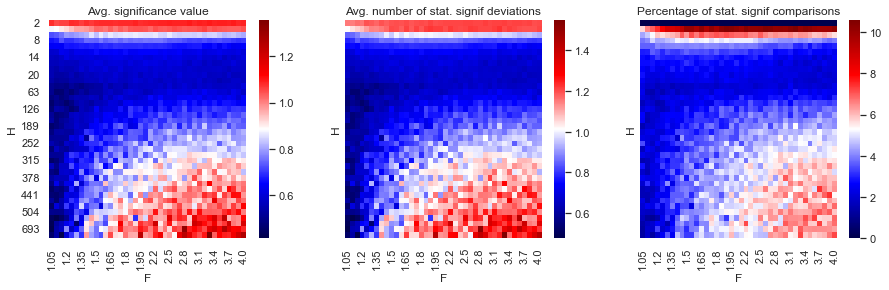

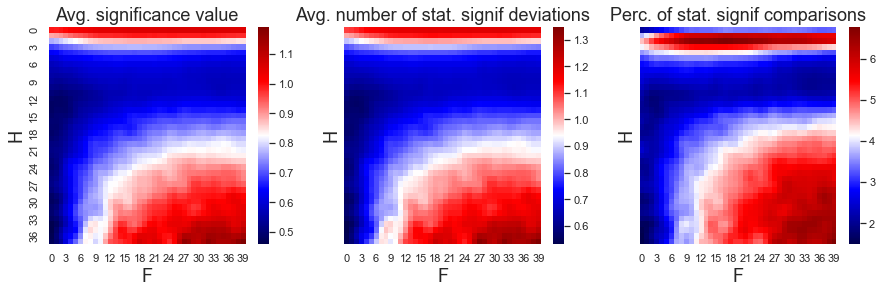

In [232]:
data_r = data.loc[(data['SumDelta'] < 10) & (data['SumDelta'] > 0)]
data_signif = heat_data(data_r, 'AvgSignificance')
data_number = heat_data(data_r, 'AvgNumberDev')
data_pers = heat_data(data_r, 'PerSignif')
data_delta = heat_data(data_r, 'SumDelta')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,4), sharey=True, sharex=True)
cmap = 'seismic'
sns.heatmap(data_signif, ax=ax1, cmap = cmap)
sns.heatmap(data_number, ax=ax2, cmap = cmap)
sns.heatmap(data_pers, ax=ax3, cmap = cmap)
sns.heatmap(data_delta, ax=ax4, cmap = cmap)
plt.show()

data_r2 = data.loc[(data['SumDelta'] < 10) & (data['SumDelta'] > 0) & (data['F'] > 1.0)]
data_signif = heat_data(data_r2, 'AvgSignificance')
data_number = heat_data(data_r2, 'AvgNumberDev')
data_pers = heat_data(data_r2, 'PerSignif')
data_delta = heat_data(data_r2, 'SumDelta')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,4), sharey=True, sharex=True)
cmap = 'seismic'
sns.heatmap(data_signif, ax=ax1, cmap = cmap)
sns.heatmap(data_number, ax=ax2, cmap = cmap)
sns.heatmap(data_pers, ax=ax3, cmap = cmap)
sns.heatmap(data_delta, ax=ax4, cmap = cmap)
ax1.set_xlabel("F")
ax1.set_ylabel("H")
ax2.set_xlabel("F")
ax2.set_ylabel("H")
ax3.set_xlabel("F")
ax3.set_ylabel("H")
ax4.set_xlabel("F")
ax4.set_ylabel("H")
ax1.set_title("Avg. significance value")
ax2.set_title("Avg. number of stat. signif deviations")
ax3.set_title('Percentage of stat. signif comparisons')
ax4.set_title("Sum Delta")
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,4), sharey=True, sharex=True)
cmap = 'seismic'
sns.heatmap(data_signif, ax=ax1, cmap = cmap)
sns.heatmap(data_number, ax=ax2, cmap = cmap)
sns.heatmap(data_pers, ax=ax3, cmap = cmap)
ax1.set_xlabel("F")
ax1.set_ylabel("H")
ax2.set_xlabel("F")
ax2.set_ylabel("H")
ax3.set_xlabel("F")
ax3.set_ylabel("H")
ax1.set_title("Avg. significance value")
ax2.set_title("Avg. number of stat. signif deviations")
ax3.set_title('Percentage of stat. signif comparisons')
plt.show()

sigma = 1
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,4), sharey=True, sharex=True)
cmap = 'seismic'
sns.heatmap(gaussian_filter(data_signif, sigma=sigma),ax=ax1, cmap = cmap)
sns.heatmap(gaussian_filter(data_number, sigma=sigma), ax=ax2, cmap = cmap)
sns.heatmap(gaussian_filter(data_pers, sigma=sigma), ax=ax3, cmap = cmap)
ax1.set_xlabel("F", fontsize=fontsize)
ax1.set_ylabel("H", fontsize=fontsize)
ax2.set_xlabel("F", fontsize=fontsize)
ax2.set_ylabel("H", fontsize=fontsize)
ax3.set_xlabel("F", fontsize=fontsize)
ax3.set_ylabel("H", fontsize=fontsize)
ax1.set_title("Avg. significance value", fontsize=fontsize)
ax2.set_title("Avg. number of stat. signif deviations", fontsize=fontsize)
ax3.set_title('Perc. of stat. signif comparisons', fontsize=fontsize)
plt.savefig('Significance.png', dpi=300)
plt.show()


# Changes in Sharpe ratios


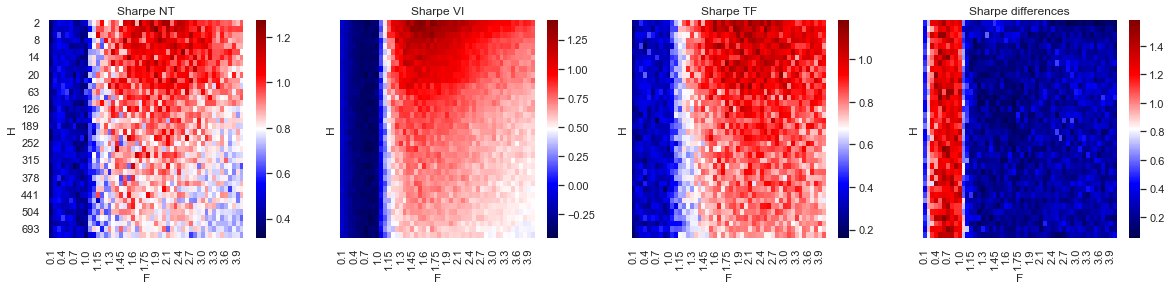

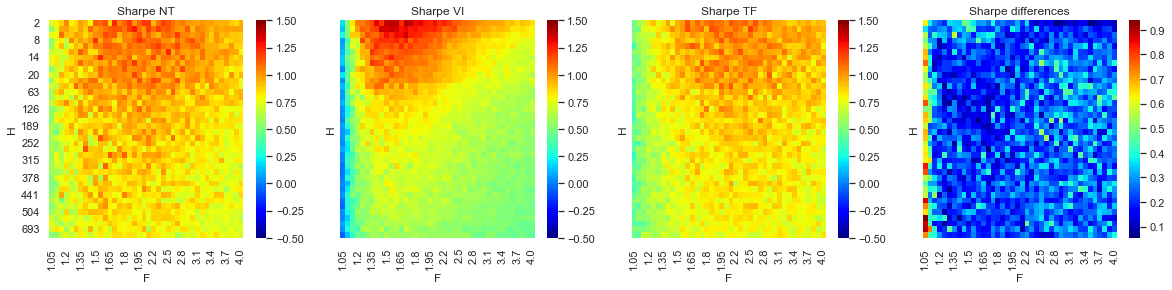

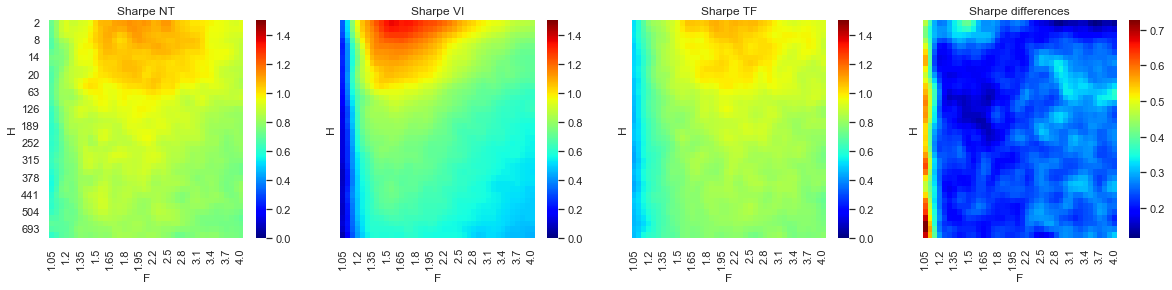

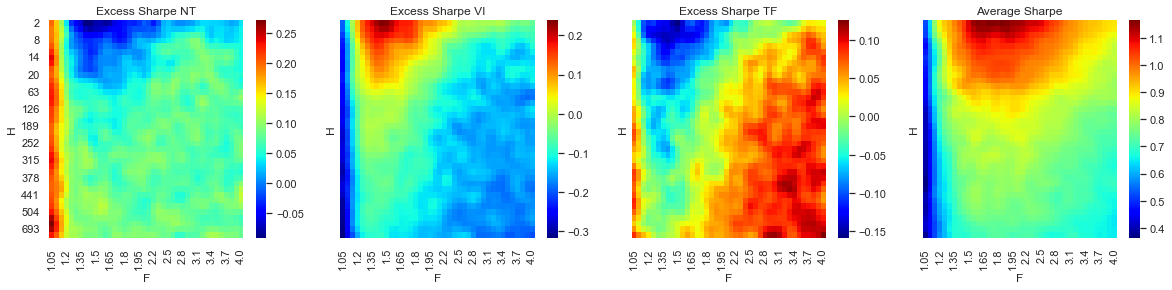

In [230]:
# data_r2 = data.loc[(data['SumDelta'] < 10) & (data['SumDelta'] > 0) & (data['F'] > 1.0)]
data_r2 = data.copy()
data_snt = heat_data(data_r2, 'SharpeNT')
data_svi = heat_data(data_r2, 'SharpeVI')
data_stf = heat_data(data_r2, 'SharpeTF')
data_sdf = heat_data(data_r2, 'DiffSharpes')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,4), sharey=True, sharex=True)
cmap = 'seismic'
sns.heatmap(data_snt, ax=ax1, cmap = cmap)
sns.heatmap(data_svi, ax=ax2, cmap = cmap)
sns.heatmap(data_stf, ax=ax3, cmap = cmap)
sns.heatmap(data_sdf, ax=ax4, cmap = cmap)
ax1.set_xlabel("F")
ax1.set_ylabel("H")
ax2.set_xlabel("F")
ax2.set_ylabel("H")
ax3.set_xlabel("F")
ax3.set_ylabel("H")
ax4.set_xlabel("F")
ax4.set_ylabel("H")
ax1.set_title("Sharpe NT")
ax2.set_title("Sharpe VI")
ax3.set_title('Sharpe TF')
ax4.set_title("Sharpe differences")
plt.show()

data_r2 = data.loc[(data['F'] > 1.0)]
# data_r2 = data.copy()
data_snt = heat_data(data_r2, 'SharpeNT')
data_svi = heat_data(data_r2, 'SharpeVI')
data_stf = heat_data(data_r2, 'SharpeTF')
data_sdf = heat_data(data_r2, 'DiffSharpes')


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,4), sharey=True, sharex=True)
cmap = 'jet'
vmin, vmax = -0.5, 1.5
model = sns.heatmap(data_snt, ax=ax1, cmap = cmap, vmin = vmin, vmax = vmax)
sns.heatmap(data_svi, ax=ax2, cmap = cmap, vmin = vmin, vmax = vmax)
sns.heatmap(data_stf, ax=ax3, cmap = cmap, vmin = vmin, vmax = vmax)
sns.heatmap(data_sdf, ax=ax4, cmap = cmap)
ax1.set_xlabel("F")
ax1.set_ylabel("H")
ax2.set_xlabel("F")
ax2.set_ylabel("H")
ax3.set_xlabel("F")
ax3.set_ylabel("H")
ax4.set_xlabel("F")
ax4.set_ylabel("H")
ax1.set_title("Sharpe NT")
ax2.set_title("Sharpe VI")
ax3.set_title('Sharpe TF')
ax4.set_title("Sharpe differences")
plt.show()

data_avg = heat_data(data_r2, 'AvgSharpe')
data_SENT = heat_data(data_r2, 'Sharpe_excess_NT')
data_SEVI = heat_data(data_r2, 'Sharpe_excess_VI')
data_SETF = heat_data(data_r2, 'Sharpe_excess_TF')

sigma = 1
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,4), sharey=True, sharex=True)
cmap = 'jet'
vmin, vmax = 0, 1.5
sns.heatmap(gaussian_filter(data_snt, sigma=sigma), ax=ax1, cmap = cmap, vmin = vmin, vmax = vmax)
sns.heatmap(gaussian_filter(data_svi, sigma=sigma), ax=ax2, cmap = cmap, vmin = vmin, vmax = vmax)
sns.heatmap(gaussian_filter(data_stf, sigma=sigma), ax=ax3, cmap = cmap, vmin = vmin, vmax = vmax)
sns.heatmap(gaussian_filter(data_sdf, sigma=sigma), ax=ax4, cmap = cmap)
ax1.set_xlabel("F")
ax1.set_ylabel("H")
ax2.set_xlabel("F")
ax2.set_ylabel("H")
ax3.set_xlabel("F")
ax3.set_ylabel("H")
ax4.set_xlabel("F")
ax4.set_ylabel("H")
ax1.set_title("Sharpe NT")
ax2.set_title("Sharpe VI")
ax3.set_title('Sharpe TF')
ax4.set_title("Sharpe differences")
ax1.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax2.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax3.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax1.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax2.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax3.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax4.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax4.set_yticklabels(model.get_yticklabels(), rotation = 0)
plt.show()

sigma = 1
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,4), sharey=True, sharex=True)
cmap = 'jet'
vmin, vmax = -1.5, 1.5
sns.heatmap(gaussian_filter(data_SENT, sigma=sigma), ax=ax1, cmap = cmap)
sns.heatmap(gaussian_filter(data_SEVI, sigma=sigma), ax=ax2, cmap = cmap)
sns.heatmap(gaussian_filter(data_SETF, sigma=sigma), ax=ax3, cmap = cmap)
sns.heatmap(gaussian_filter(data_avg, sigma=sigma), ax=ax4, cmap = cmap)
ax1.set_xlabel("F")
ax1.set_ylabel("H")
ax2.set_xlabel("F")
ax2.set_ylabel("H")
ax3.set_xlabel("F")
ax3.set_ylabel("H")
ax4.set_xlabel("F")
ax4.set_ylabel("H")
ax1.set_title("Excess Sharpe NT")
ax2.set_title("Excess Sharpe VI")
ax3.set_title('Excess Sharpe TF')
ax4.set_title("Average Sharpe")
ax1.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax2.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax3.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax1.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax2.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax3.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax4.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax4.set_yticklabels(model.get_yticklabels(), rotation = 0)
plt.show()




# TODO: complement with flows

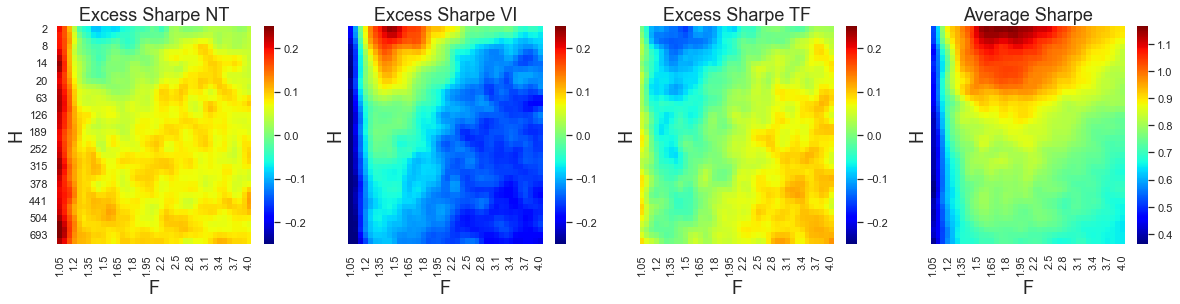

In [231]:
sigma = 1
fontsize = 18
sns.set(font_scale=1) 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,4), sharey=True, sharex=True)
cmap = 'jet'
vmin, vmax = -0.25, 0.25
sns.heatmap(gaussian_filter(data_SENT, sigma=sigma), ax=ax1, cmap = cmap, vmin= vmin, vmax=vmax)
sns.heatmap(gaussian_filter(data_SEVI, sigma=sigma), ax=ax2, cmap = cmap, vmin= vmin, vmax=vmax)
sns.heatmap(gaussian_filter(data_SETF, sigma=sigma), ax=ax3, cmap = cmap, vmin= vmin, vmax=vmax)
sns.heatmap(gaussian_filter(data_avg, sigma=sigma), ax=ax4, cmap = cmap)
ax1.set_xlabel("F", fontsize=fontsize)
ax1.set_ylabel("H", fontsize=fontsize)
ax2.set_xlabel("F", fontsize=fontsize)
ax2.set_ylabel("H", fontsize=fontsize)
ax3.set_xlabel("F", fontsize=fontsize)
ax3.set_ylabel("H", fontsize=fontsize)
ax4.set_xlabel("F", fontsize=fontsize)
ax4.set_ylabel("H", fontsize=fontsize)
ax1.set_title("Excess Sharpe NT", fontsize=fontsize)
ax2.set_title("Excess Sharpe VI", fontsize=fontsize)
ax3.set_title('Excess Sharpe TF', fontsize=fontsize)
ax4.set_title("Average Sharpe", fontsize=fontsize)
ax1.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax2.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax3.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax1.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax2.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax3.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax4.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax4.set_yticklabels(model.get_yticklabels(), rotation = 0)
plt.savefig('ExcessSharpe.png', dpi=300)
plt.show()